## NVLab Summer School Assignment 1

In [65]:
# from google.colab import drive
# drive.mount('/content/drive')

In [66]:
# !ls /content/drive/
# %cd "/content/drive/My Drive"
# %cd "HW1/resources"

# !ls

In [67]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
# from google.colab.patches import cv2_imshow

### Part3. Albumentations

In [68]:
import albumentations as A

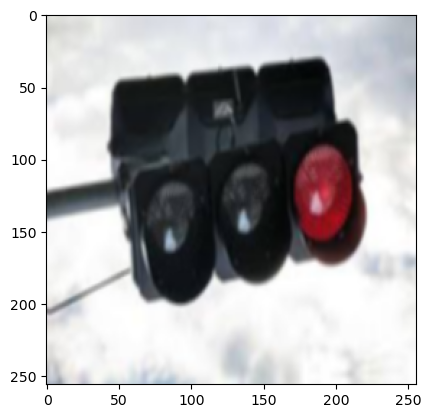

True

In [69]:
# read image from resource/
img = cv2.imread("resource/r1.jpg")

transform = A.Compose([
    A.Blur(),            
    A.Rotate(limit=30),
    A.Flip(), 
    A.Resize(width=256, height=256),
])
albu_aug_img = transform(image=img)['image'] 

# cv2_imshow(img_o)
plt.imshow(cv2.cvtColor(albu_aug_img, cv2.COLOR_BGR2RGB))
plt.show()

albu_aug_path = "output/part3/albumentation.jpg"

albu_aug_folder_path = os.path.dirname(albu_aug_path)
os.makedirs(albu_aug_folder_path, exist_ok=True)
cv2.imwrite(albu_aug_path, albu_aug_img)

### Part4. Torchvision

In [70]:
import torch
import torchvision.transforms as transforms

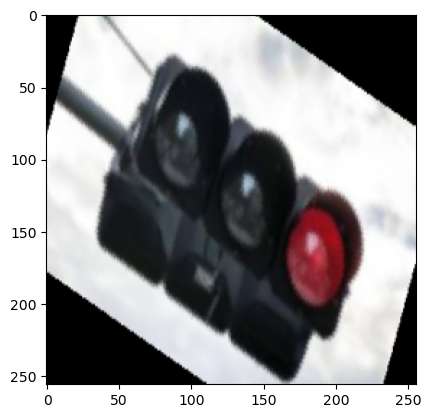

In [71]:
transform = transforms.Compose([
    transforms.ToPILImage(),                     # Convert numpy array to PIL Image
    transforms.GaussianBlur(kernel_size=5),       # Apply Gaussian blur with kernel size 5
    transforms.RandomRotation(degrees=30),        # Randomly rotate the image up to 30 degrees
    transforms.RandomHorizontalFlip(),           # Randomly flip the image horizontally with a probability of 0.5
    transforms.Resize((256, 256)),                # Resize the image to a width and height of 256 pixels
])

# Apply the transformations
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
transformed_image = transform(RGB_img)              

# Display the transformed image
plt.imshow(transformed_image)
plt.show()

# Save the transformed image
torch_aug_path = "output/part3/torchvision.jpg"
torch_aug_folder_path = os.path.dirname(torch_aug_path)
os.makedirs(torch_aug_folder_path, exist_ok=True)
transformed_image.save(torch_aug_path)